# Chapter 2. Pytorch
## Basic Operation

## 0. preparing

In [ ]:
#라이브러리 import
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
torch.tensor?

## 1. Tensors
- 데이터 구조(arrays, matrices와 유사)
- 넘파이의 ndarrays와 유사(GPU나 다른 하드웨어에서 실행될 수 있다는 점이 넘파이와 다른 점)
- automatic differentiation



### 데이터 타입에 따른 dtype / tensor 정리   
[pytorch 공식사이트 : TORCH.TENSOR](https://pytorch.org/docs/stable/tensors.html)  
  
| datatype | dtype | CPU tensor | GPU tensor|  
| :-: | :-: | :-: | :-: |  
|32bit float | `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor`|  
|64bit float | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor`|  
|16bit float | `torch.float16` or `torch.half`  | `torch.HalfTensor` | `torch.cuda.HalfTensor`|  
|32bit int | `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor`|  
|64bit int | `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor`|  
|16bit int | `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.Short`|

### Initializing a Tensor
- Directly from data:
`torch.tensor(data)`
- From a Numpy array: `torch.tensor(np_array)`
- With random or constant values:`torch.rand(shape)`,`torch.ones(shape)`
(참고) shape에 `[,]`나 `(,)`는 상관 없음

#### 1.1.1. Directly from data

In [ ]:
data=[[1,2],[3,4]]
x_data=torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

#### 1.1.2 From a NumPy array

In [ ]:
np_array=np.array(data)
x_np=torch.tensor(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

#### 1.1.3 With random or constant values
`torch.randint(low=0, high, size, *, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`



In [ ]:
shape=(2,3,)
rand_tensor=torch.rand(shape)
ones_tensor=torch.ones(shape)
zeros_tensor=torch.zeros(shape)

print(zeros_tensor)

### 1.2. Attributes of a Tensor
- shape
- dtype
- device: 어디에 저장되어 있는가

In [ ]:
tensor=torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device of tensor: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device of tensor: cpu


#### 참고)파이썬 f-문자열
- 문자열 앞에 f 또는 F를 붙여서 f-문자열을 생성
- 중괄호 {} 내에 변수, 표현식, 함수 호출 등을 삽입->이를 문자열로 반환하여 삽입

### 1.3. Operations on Tensors
- 너무 많으니 described `here <https://pytorch.org/docs/stable/torch.html>`__. 여기 들어가서 확인  
- tensors를 GPU로 바꾸기   
 1) `torch.cuda.is_available()`로 확인  
 2)`tenso.to('cuda')`

In [ ]:
# 가능하면 tensor를 GPU로 옮기기
if torch.cuda.is_available():
  tensor=tensor.to('cuda')
print(tensor)

tensor([[0.8696, 0.2695, 0.7550, 0.6340],
        [0.9581, 0.6308, 0.4387, 0.6073],
        [0.4711, 0.5854, 0.5121, 0.9183]])


#### 1.3.1 Standard numpy-like indexing and slicing
- 행 추출: `tensor[0]`  
- 열 추출: `tensor[:,0]`  
- 거꾸로 세기: `tensor[:,-1]`

In [ ]:
tensor=torch.rand((4,4))
tensor

tensor([[0.4732, 0.1120, 0.9935, 0.7700],
        [0.9574, 0.7020, 0.1079, 0.0139],
        [0.6336, 0.9268, 0.6559, 0.4593],
        [0.8574, 0.5245, 0.3987, 0.6879]])

In [ ]:
print('First row:',tensor[0])
print('First column:',tensor[:,0])
print('Last column',tensor[:,-1])
tensor[:,1]=0
print(tensor)

First row: tensor([0.4732, 0.1120, 0.9935, 0.7700])
First column: tensor([0.4732, 0.9574, 0.6336, 0.8574])
Last column tensor([0.7700, 0.0139, 0.4593, 0.6879])
tensor([[0.4732, 0.0000, 0.9935, 0.7700],
        [0.9574, 0.0000, 0.1079, 0.0139],
        [0.6336, 0.0000, 0.6559, 0.4593],
        [0.8574, 0.0000, 0.3987, 0.6879]])


#### 1.3.2 Joining tensors
넘파이와 동일  
`torch.cat([tensor,tensor],axis=0)`  
`torch.stack([tensor,tensor],axis=1)`


In [ ]:
t1=torch.cat([tensor,tensor],axis=0)
print(t1.shape)
t2=torch.cat([tensor,tensor],axis=1)
print(t2.shape)

torch.Size([8, 4])
torch.Size([4, 8])


In [ ]:
t3=torch.stack([tensor,tensor],axis=0)
print(t3.shape)
print(t3)

t4=torch.stack([tensor,tensor],axis=2)
print(t4.shape)
print(t4)

torch.Size([2, 4, 4])
tensor([[[0.4732, 0.0000, 0.9935, 0.7700],
         [0.9574, 0.0000, 0.1079, 0.0139],
         [0.6336, 0.0000, 0.6559, 0.4593],
         [0.8574, 0.0000, 0.3987, 0.6879]],

        [[0.4732, 0.0000, 0.9935, 0.7700],
         [0.9574, 0.0000, 0.1079, 0.0139],
         [0.6336, 0.0000, 0.6559, 0.4593],
         [0.8574, 0.0000, 0.3987, 0.6879]]])
torch.Size([4, 4, 2])
tensor([[[0.4732, 0.4732],
         [0.0000, 0.0000],
         [0.9935, 0.9935],
         [0.7700, 0.7700]],

        [[0.9574, 0.9574],
         [0.0000, 0.0000],
         [0.1079, 0.1079],
         [0.0139, 0.0139]],

        [[0.6336, 0.6336],
         [0.0000, 0.0000],
         [0.6559, 0.6559],
         [0.4593, 0.4593]],

        [[0.8574, 0.8574],
         [0.0000, 0.0000],
         [0.3987, 0.3987],
         [0.6879, 0.6879]]])


#### 1.3.3 Arithmetic operations
- 행렬 곱: `tensor.matnul(tensor.T)` 혹은 `tensor @ tensor.T`  
- element-wise product: `tensor.mul(tensor)`혹은`tensor*tensor`

In [ ]:
y1=tensor@tensor.T
y2=tensor.matmul(tensor.T)

print(y1)
print(y2)

tensor([[1.8040, 0.5710, 1.3052, 1.3316],
        [0.5710, 0.9285, 0.6837, 0.8735],
        [1.3052, 0.6837, 1.0426, 1.1207],
        [1.3316, 0.8735, 1.1207, 1.3673]])
tensor([[1.8040, 0.5710, 1.3052, 1.3316],
        [0.5710, 0.9285, 0.6837, 0.8735],
        [1.3052, 0.6837, 1.0426, 1.1207],
        [1.3316, 0.8735, 1.1207, 1.3673]])


In [ ]:
y3=tensor*tensor
y4=tensor.mul(tensor)

print(y3)
print(y4)

tensor([[2.2395e-01, 0.0000e+00, 9.8706e-01, 5.9295e-01],
        [9.1661e-01, 0.0000e+00, 1.1648e-02, 1.9187e-04],
        [4.0142e-01, 0.0000e+00, 4.3021e-01, 2.1095e-01],
        [7.3520e-01, 0.0000e+00, 1.5896e-01, 4.7317e-01]])
tensor([[2.2395e-01, 0.0000e+00, 9.8706e-01, 5.9295e-01],
        [9.1661e-01, 0.0000e+00, 1.1648e-02, 1.9187e-04],
        [4.0142e-01, 0.0000e+00, 4.3021e-01, 2.1095e-01],
        [7.3520e-01, 0.0000e+00, 1.5896e-01, 4.7317e-01]])


**Single-element tensors**   
단일 텐서의 경우 values를 얻고 싶으면 `item()`붙이기

In [ ]:
agg=tensor.sum()
agg_item=agg.item()
print(agg_item, type(agg_item),type(agg))

7.008747577667236 <class 'float'> <class 'torch.Tensor'>


### 1.4 Bridge with NumPy
Tensors와 NumPy memory locations를 공유할 수 있음 (변경이 상호 영향을 주게 됨.)


Tensor to Numpy array   
`텐서이름.numpy()`

In [ ]:
t=torch.ones(5)
print(t)
n=t.numpy()
print(n)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


tensor 변화가 NumPy에 영향

In [ ]:
t[3]=10
print(f"t:{t}")
print(f"n:{n}")

t:tensor([ 1.,  1.,  1., 10.,  1.])
n:[ 1.  1.  1. 10.  1.]


NumPy array to Tensor  
`torch.tensor(넘파이 이름)`

In [ ]:
n=np.ones(5)
t=torch.tensor(n)

NumPy변화가 Tensor에 영향

In [ ]:
n[1]=3
print(t)
print(n)

NameError: name 'n' is not defined

## Datasets and Dataloader
`torch.utils.data.DataLoader`: TensorDataset을 batch_size=16을 통해 각 Batch구
`torch.utils.data.Dataset`: torch.Tensoer 타입의 데이터들을 사용해서 TensorDataset 구성

### 2.1 Loading a Dataset
<라이브러리 다운 받기>  
1. import 시키기  
`import torch`  
`from torch.utils.data import Dataset`  
`import matplotlib.pyplot as plt`  
`from torchvision import datasets`  
`from torchvision.transforms import ToTensor`  
2. training_data=datasets.FashionMNIST()  
3. 인자 전달  
`root`: train/test data가 저장할 path  
`train`: specifies the dataset  
`download=True`downloads the data (root 에서는 불가능)  
`transfor` & `target_transform`: specify the feature and label transformations

<google colab 마운트 시키기>  
1. `from google.colab import drive`  
2. `drive.mount('/content/drive')`    




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
training_data = datasets.FashionMNIST(
    root="/content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data",
    train=True,
    download=True,
    transform=ToTensor()
  )

100%|██████████| 26421880/26421880 [00:02<00:00, 12874569.44it/s]


Extracting /content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 233526.78it/s]


Extracting /content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4278606.67it/s]


Extracting /content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5862687.21it/s]

Extracting /content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data/FashionMNIST/raw



In [5]:
test_data=datasets.FashionMNIST(
    root="/content/drive/MyDrive/study_lab/Self_Study\Group8_Pytorch/data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 2.2 Iterating and Visualizing the Dataset
`Datasets`를 인덱싱하고 list처럼 다룸  
`training_data[index]`  :여기 안에 각각의 정보가 들어 있음(이미지와 인덱스)  
`matplotlib`를 사용해 데이터를 시각화시킴: `plt.imshow(img.squeeze())`

9


torch.Size([1, 28, 28])

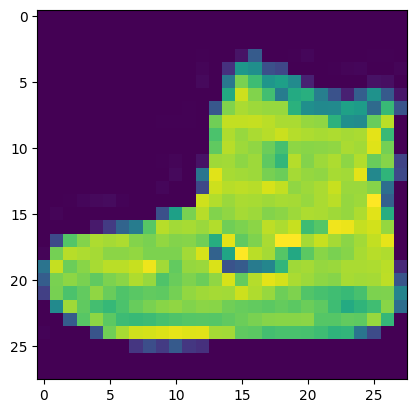

In [6]:
img, label=training_data[0] #텐서로 저장된 이미지 배열과 label이 묶여서 저장되어 있음
plt.imshow(img.squeeze())
print(label)
img.shape

In [7]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

#### matplotlib 라이브러리
0. `import matplotlib.pyplot as plt`:  import하기  
1. `figure=plt.figure(figsize=(8,8))` :(8,8)큰 이미지의 plt 만들기  
2. `cols,rows=3,3` :서브플롯을 배치할 열과 행의 수 결정  
3. `figure.add_subplot(rows,cols,i)`: 넣어줄 위치 설정  
4. `plt.title(원하는 이름)` ,`plt.axis("off")`: 표시할 내용 정해주기  
5. `plt.imshow(img.squeeze(), cmap="gray")`

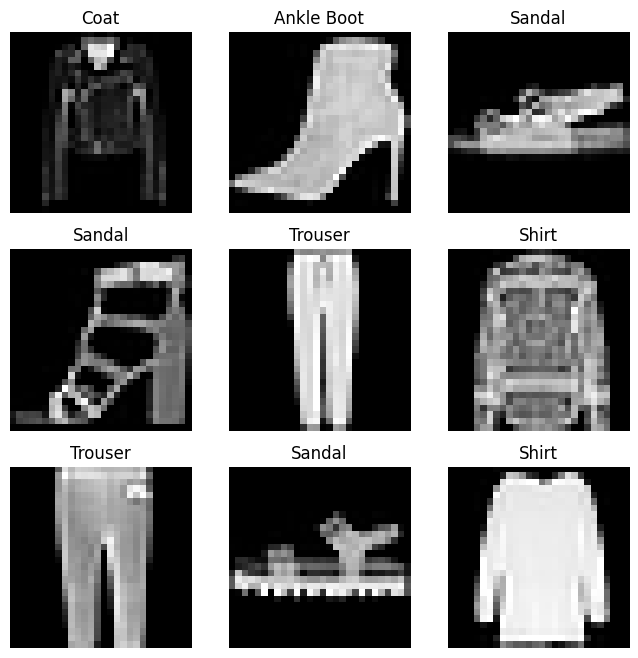

In [17]:
#딕셔너리 정의
labels_map={
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "CDress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure=plt.figure(figsize=(8,8))
cols, rows=3,3

for i in range(1,cols*rows+1):
  sample_idx=torch.randint(len(training_data),size=(1,)).item()
  img,label=training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(),cmap="gray")
plt.show()


## 2.3 Creating a custom Dataset for your files

In [20]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

`torch.manual_seed(숫자)`: 랜덤시드를 고정하기 위한 코드

<내가 만든 텐서들로 데이터 만들어주기: TensorDataset>  
1. import시키기  
`from torch.utils.data import TensorDataset`  
2. `TensorDataset(x,y)`: x,y는 텐서 데이터로 각각을 합쳐줌  
3. 다시 받아줄 때 XX,YY로 x부분 y부분 따로 음

In [23]:
length=5
x=2*torch.rand([length,2])
print(x)
y=torch.sum(x, axis=1)
print(y)

tensor([[0.6276, 0.3960],
        [0.8324, 0.5687],
        [0.6796, 1.0479],
        [1.5961, 1.5435],
        [0.0224, 1.6199]])
tensor([1.0236, 1.4010, 1.7274, 3.1397, 1.6424])


In [24]:
from torch.utils.data import TensorDataset, DataLoader
mydata=TensorDataset(x,y)

In [28]:
print(mydata[1])
print(mydata[1:3][0])

(tensor([0.8324, 0.5687]), tensor(1.4010))
tensor([[0.8324, 0.5687],
        [0.6796, 1.0479]])


In [29]:
print("Value on index 0 of out toy_set object: ",mydata[0])

Value on index 0 of out toy_set object:  (tensor([0.6276, 0.3960]), tensor(1.0236))


In [30]:
print("our toy_set length:",len(mydata))

our toy_set length: 5


In [32]:
XX,YY=mydata[0:3]
print(XX,YY)
print(XX)
print(YY)

tensor([[0.6276, 0.3960],
        [0.8324, 0.5687],
        [0.6796, 1.0479]]) tensor([1.0236, 1.4010, 1.7274])
tensor([[0.6276, 0.3960],
        [0.8324, 0.5687],
        [0.6796, 1.0479]])
tensor([1.0236, 1.4010, 1.7274])


#### Exercis 1:

You are given the following toy data:
```
Y= np.array([3.0, 2.1, 5.8])
X= np.array([[1.0, 0.1],
             [2.5, -0.5],
             [3.1, 0.7]])
```

Answer the following questions.

[1] Write the code to make Dataset object of X and Y in Pytorch.

[2] Write the code to retrieve first two lines of X from Dataset.

In [34]:
import numpy as np
Y= np.array([3.0, 2.1, 5.8])
X= np.array([[1.0, 0.1],
             [2.5, -0.5],
             [3.1, 0.7]])

In [37]:
x=torch.Tensor(X)
y=torch.Tensor(Y)

In [41]:
#1
from torch.utils.data import TensorDataset
mydata=TensorDataset(x,y)

In [44]:
#2
XX=mydata[0:1][0]
print(XX)

tensor([[1.0000, 0.1000]])


## 2.4 Dataloader
DataLoader를 통해 Dataset의 전체 데이터가 batch size로 slice되어 공급됨. DataLoader는 iterator 형식으로 데이터에 접근 하도록 함.  batch_size나 shuffle 유무를 설정할 수 있다.

<Dataset을 미니배치 형태로 만들기 : DataLoader사용법>  
1. import하기   
`from torch.utils.data import Dataloader`  
2. `dataloader=Dataloader(dataset, batch_size=원하는 숫자, shuffle=True)`


#### Iterator란 무엇인가
Python에서 컬렉션(ex 리스트, 튜플, 딕셔너리 등) 내의 요소를 순차적으로 접근할 수 있는 객체. Iterator는 두 가지 주요 메서드를 가짐  
`__iter__()`: Iterator 자체 반환  
`__next__()`: 컬렉션의 다음 요소를 반환  
  
`Iterator`를 사용하면, 컬렉션의 모든 요소를 순회할 때까지 `__next__()` 메서드를 반복적으로 호출할 수 있음.  모든 요소를 순회하고 나면, `iterator`는 `StopIteration` 예외를 발생시켜 더 이상 요소가 없음을 알림

In [45]:
#라이브러리 import 하기
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [47]:
X=torch.rand([5,2]) #다른 것은 안 전달하고 size만 전달해서 줌
Y=torch.randint(low=0,high=10,size=[5])
print(X,Y)

tensor([[0.9906, 0.2885],
        [0.8750, 0.5059],
        [0.2366, 0.7570],
        [0.2346, 0.6471],
        [0.3556, 0.4452]]) tensor([4, 5, 8, 0, 1])


In [62]:
#내가 원하는 dataset으로 만들기
dataset=TensorDataset(X,Y)
#원하는 베치 사이즈로 만들기
trainloader=DataLoader(dataset=dataset, batch_size=1, shuffle=False)

In [63]:
for xx, yy in trainloader:
  print("xx=",xx,"yy=",yy)

xx= tensor([[0.9906, 0.2885]]) yy= tensor([4])
xx= tensor([[0.8750, 0.5059]]) yy= tensor([5])
xx= tensor([[0.2366, 0.7570]]) yy= tensor([8])
xx= tensor([[0.2346, 0.6471]]) yy= tensor([0])
xx= tensor([[0.3556, 0.4452]]) yy= tensor([1])


In [59]:
trainloader=DataLoader(dataset=dataset, batch_size=1, shuffle=True)

In [65]:
for xx, yy in trainloader:
  print("xx=",xx,"yy=",yy)

xx= tensor([[0.9906, 0.2885]]) yy= tensor([4])
xx= tensor([[0.8750, 0.5059]]) yy= tensor([5])
xx= tensor([[0.2366, 0.7570]]) yy= tensor([8])
xx= tensor([[0.2346, 0.6471]]) yy= tensor([0])
xx= tensor([[0.3556, 0.4452]]) yy= tensor([1])


In [75]:
trainloader=DataLoader(dataset=dataset, batch_size=2,shuffle=False)

In [76]:
for xx, yy in trainloader:
  print(yy)

tensor([4, 5])
tensor([8, 0])
tensor([1])


In [77]:
trainloader=DataLoader(dataset=dataset, batch_size=2, shuffle=True)

In [78]:
for xx, yy in trainloader:
  print("xx=",xx,"yy=",yy)

xx= tensor([[0.9906, 0.2885],
        [0.2346, 0.6471]]) yy= tensor([4, 0])
xx= tensor([[0.3556, 0.4452],
        [0.8750, 0.5059]]) yy= tensor([1, 5])
xx= tensor([[0.2366, 0.7570]]) yy= tensor([8])
